In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
!pip install tensorflow_decision_forests
import tensorflow as tf
import tensorflow_decision_forests as tfdf

drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successf

In [2]:
# Load a CSV file from Google Drive
file_path_test = '/content/drive/MyDrive/Adam Lee_ BUDT758J_Kaggle/Dataset/test.csv'
file_path_train = '/content/drive/MyDrive/Adam Lee_ BUDT758J_Kaggle/Dataset/train.csv'

In [3]:
# Load the dataset
train_data = pd.read_csv(file_path_train)
test_data = pd.read_csv(file_path_test)
# Drop the 'Id' column from both train and test datasets
train_data.drop(columns=['Id'], inplace=True)

In [4]:
# Feature Engineering
# 1. Total Square Footage: Combining 1st and 2nd floor square footage with basement square footage
train_data['TotalSqFt'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['TotalBsmtSF']

# 2. Overall Quality and Condition Composite Score: Multiplying quality and condition ratings
train_data['QualCondIndex'] = train_data['OverallQual'] * train_data['OverallCond']

# 3. Age of Property at Sale: Calculating the age of the property at the time of sale
train_data['AgeAtSale'] = train_data['YrSold'] - train_data['YearBuilt']
# Years Since Last Remodel: Calculating how many years have passed since the last remodel
train_data['YearsSinceRemodel'] = train_data['YrSold'] - train_data['YearRemodAdd']

# 4. Presence of Amenities: Creating binary indicators for the presence of pools, garages, and fireplaces
train_data['HasPool'] = (train_data['PoolArea'] > 0).astype(int)
train_data['HasGarage'] = (train_data['GarageArea'] > 0).astype(int)
train_data['HasFireplace'] = (train_data['Fireplaces'] > 0).astype(int)

# 5. Total Bathrooms: Summing all types of bathrooms in the house
train_data['TotalBathrooms'] = train_data['FullBath'] + (0.5 * train_data['HalfBath']) + \
                               train_data['BsmtFullBath'] + (0.5 * train_data['BsmtHalfBath'])

# 6. Total Porch Area: Combining all porch area measurements into one total porch area feature
train_data['TotalPorchSF'] = train_data['OpenPorchSF'] + train_data['EnclosedPorch'] + \
                             train_data['3SsnPorch'] + train_data['ScreenPorch']

# Display the head of the DataFrame to see the newly created features
print(train_data[['TotalSqFt', 'QualCondIndex', 'AgeAtSale', 'YearsSinceRemodel', 'HasPool',
                  'HasGarage', 'HasFireplace', 'TotalBathrooms', 'TotalPorchSF']].head())


   TotalSqFt  QualCondIndex  AgeAtSale  YearsSinceRemodel  HasPool  HasGarage  \
0       2566             35          5                  5        0          1   
1       2524             48         31                 31        0          1   
2       2706             35          7                  6        0          1   
3       2473             35         91                 36        0          1   
4       3343             40          8                  8        0          1   

   HasFireplace  TotalBathrooms  TotalPorchSF  
0             0             3.5            61  
1             1             2.5             0  
2             1             3.5            42  
3             1             2.0           307  
4             1             3.5            84  


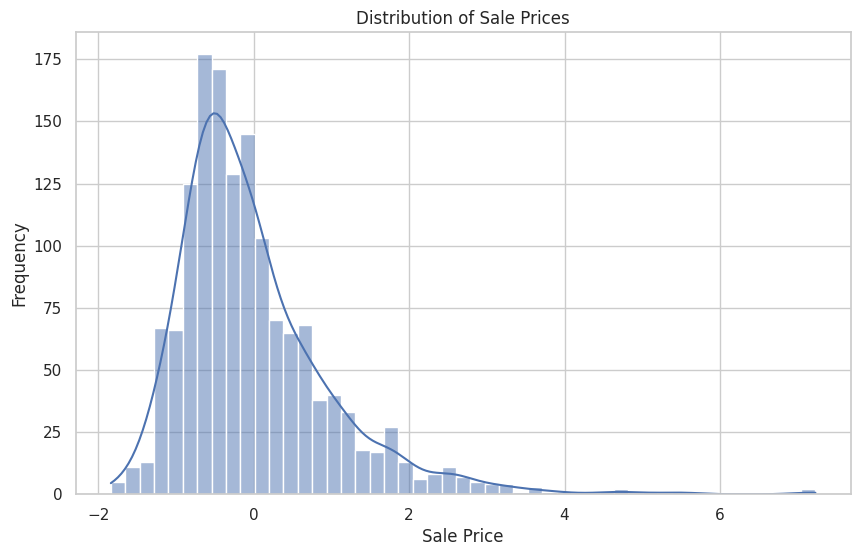

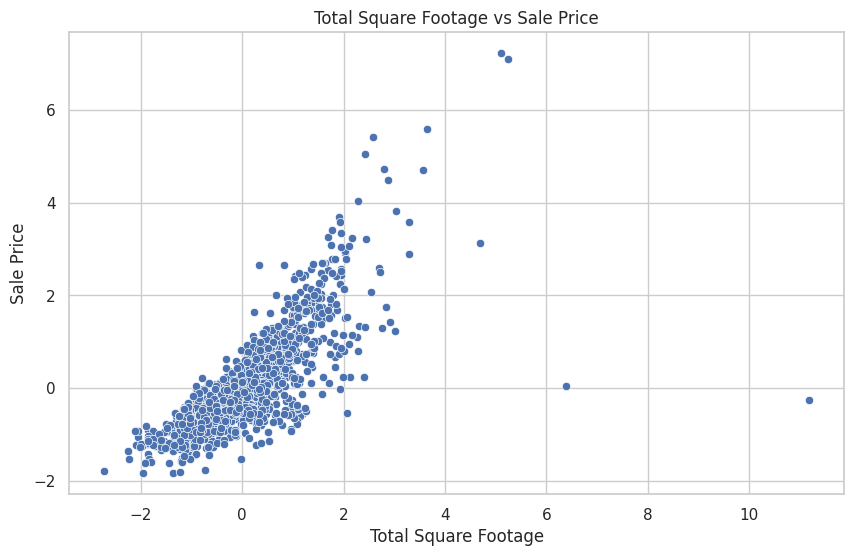

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization environment
sns.set(style="whitegrid")

# Histogram of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Total Square Footage vs Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSqFt', y='SalePrice', data=train_data)
plt.title('Total Square Footage vs Sale Price')
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price')
plt.show()




In [ ]:
# Descriptive statistics for the dataset
print(train_data.describe())


        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

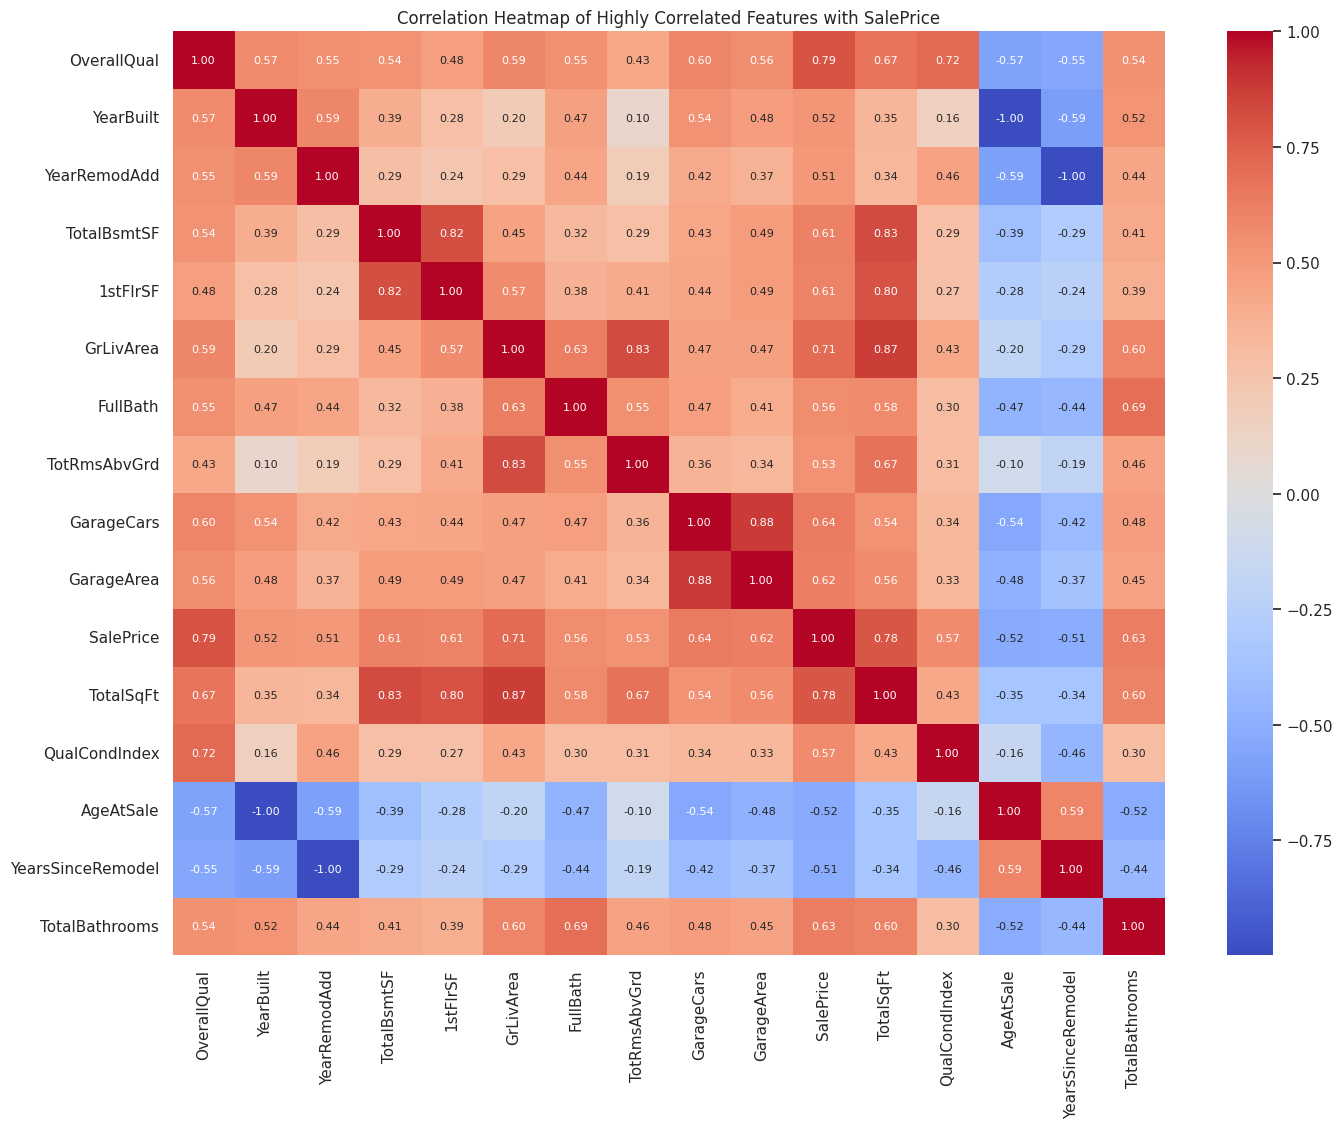

In [ ]:
# Correlation of features with Sale Price

# Filter out non-numeric columns to avoid issues in correlation matrix calculation
numeric_cols = train_data.select_dtypes(include=[np.number])  # Only selects numeric columns
correlation_matrix = numeric_cols.corr()
import numpy as np


# Filter to reduce the number of variables in the heatmap
# For example, consider only variables with a high absolute correlation to SalePrice
high_corr_vars = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) > 0.5].index
filtered_corr_matrix = correlation_matrix.loc[high_corr_vars, high_corr_vars]

# Plotting the correlation heatmap
plt.figure(figsize=(16, 12))  # Increased figure size
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'size': 8})  # Adjust annot_kws for font size
plt.title('Correlation Heatmap of Highly Correlated Features with SalePrice')
plt.show()

# Data Preprocessing

### Missing Values

In [ ]:
from sklearn.impute import SimpleImputer
# Redefine 'numeric_cols' to ensure it contains only numeric column names
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns considered:", numeric_cols)

from sklearn.impute import SimpleImputer

# Create imputers for numerical data
num_imputer = SimpleImputer(strategy='mean')

# Apply imputation for numeric data
train_data[numeric_cols] = num_imputer.fit_transform(train_data[numeric_cols])

# For categorical data: find categorical columns first, then impute
categorical_cols = train_data.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols] = cat_imputer.fit_transform(train_data[categorical_cols])



Numeric columns considered: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalSqFt', 'QualCondIndex', 'AgeAtSale', 'YearsSinceRemodel', 'HasPool', 'HasGarage', 'HasFireplace', 'TotalBathrooms', 'TotalPorchSF']


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])


### Encoding the categorical variable

In [ ]:
train_data = pd.get_dummies(train_data, drop_first=True)


### Splitting into training and test data

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'SalePrice' is the target variable
X = train_data.drop('SalePrice', axis=1, errors='ignore')  # Use errors='ignore' to handle cases where 'SalePrice' might not exist
y = train_data['SalePrice'] if 'SalePrice' in train_data.columns else None

# Split the data, only if 'y' is not None
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
    rmse = np.sqrt(mse)  # Calculate root mean squared error
    print(f"{name} RMSE: {rmse}")



Linear Regression RMSE: 6157466.019803508
Decision Tree RMSE: 0.5208468747377635
Random Forest RMSE: 0.37192495048475244
Gradient Boosting RMSE: 0.3323080465218499


### HyperParameter Tuning- Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
gb = GradientBoostingRegressor()

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error')

# Fit to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSE: 0.3271969521598334


### Model Evaluation with best parameters

In [ ]:
# Using the best estimator found by GridSearchCV
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE with tuned Gradient Boosting:", rmse)


Test RMSE with tuned Gradient Boosting: 0.3228337075349547


### Feature Importance Analysis

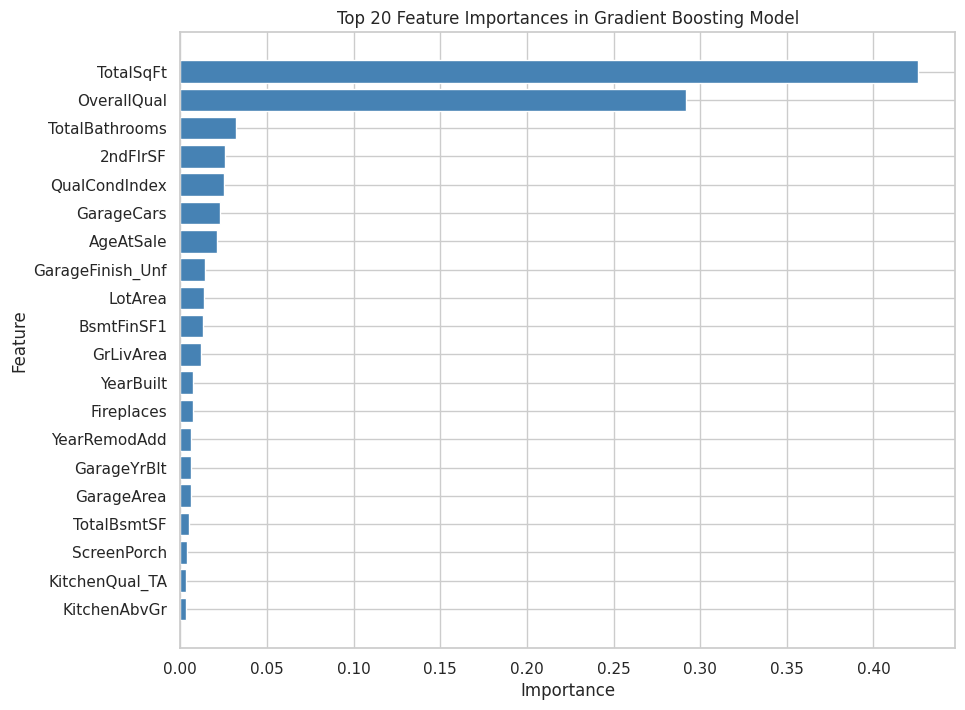

In [ ]:

feature_importances = best_gb.feature_importances_

# Create indices based on feature importances (sorted)
sorted_indices = np.argsort(feature_importances)[::-1]

# Define how many top features you want to display
top_n = 20  # You can adjust this number based on how many features you want to see

plt.figure(figsize=(10, 8))  # Increase figure size
plt.title('Top 20 Feature Importances in Gradient Boosting Model')
plt.barh(range(top_n), feature_importances[sorted_indices[:top_n]], color='steelblue', align='center')
plt.yticks(range(top_n), [X_train.columns[i] for i in sorted_indices[:top_n]])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important at the top
plt.show()


# Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model with the best parameters found earlier
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Calculate the average RMSE across all folds
cv_rmse = -cv_scores.mean()

print("Average RMSE from 5-fold cross-validation:", cv_rmse)


Average RMSE from 5-fold cross-validation: 0.32709634229007273


In [ ]:
# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2)

# Fit the model on your training data
gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_test = gb_model.predict(X_test)

# Calculate the RMSE on the test data
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("RMSE on test data:", test_rmse)


RMSE on test data: 0.33982974728411913
